In [44]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import os
import cv2
from PIL import Image
import numpy as np

In [3]:
SIZE = 150

In [4]:
INPUT_SHAPE = (SIZE,SIZE,3)

model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [7]:
model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

In [15]:
""" the number of images to be selected during each loop"""
batch_size = 16
train = 'E:/datasets/AtopicDemaDataset/'
validate = 'E:/datasets/AtopicDema/'

In [16]:
"""
for training the image
prepare our data
flow from directory()
to generate batches of image data and their labels
in their respective folders
data augumentation
"""
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=45,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

""" rescaling the image for validation"""

validation_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
""" train the image 
flow from directory is a method"""
train_generator = train_datagen.flow_from_directory(
    train,#input directory E:/datasets/AtopicDemaDataset/
    target_size=(150,150),
    batch_size=16 #batch_size,
    class_mode='binary'
)

Found 3204 images belonging to 2 classes.


In [18]:
validation_generator = validation_datagen.flow_from_directory(
    validate,#input directory
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)

Found 2518 images belonging to 2 classes.


In [20]:
validation_generator.classes

array([0, 0, 0, ..., 1, 1, 1])

In [21]:
validation_generator.class_indices

{'Infected': 0, 'Uninfected': 1}

In [28]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

#to prevent overfitting
es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience= 3, verbose = 1, mode = 'auto')

mcp = ModelCheckpoint(monitor="val_accuracy", filepath="E:\datasets/malaria_model.h5",verbose= 1, save_best_only=True , mode = 'auto')

x = [es,mcp]

In [34]:
h = model.fit_generator(
    train_generator,
    steps_per_epoch=2000 // batch_size, #2 slash division returns rounded int

    # number of loops
    epochs=5,
    validation_data=validation_generator,
    validation_steps=800 // batch_size,
    callbacks=x
)

C:\Users\XERXES~1\AppData\Local\Temp/ipykernel_7812/3882440791.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  h = model.fit_generator(


Epoch 1/5
125/125 [==============================] - ETA: 0s - loss: 0.2550 - accuracy: 0.8753
Epoch 1: val_accuracy did not improve from 0.94500
125/125 [==============================] - 325s 2s/step - loss: 0.2550 - accuracy: 0.8753 - val_loss: 0.1915 - val_accuracy: 0.9350
Epoch 2/5
125/125 [==============================] - ETA: 0s - loss: 0.2647 - accuracy: 0.8768
Epoch 2: val_accuracy did not improve from 0.94500
125/125 [==============================] - 182s 1s/step - loss: 0.2647 - accuracy: 0.8768 - val_loss: 0.5415 - val_accuracy: 0.6675
Epoch 3/5
125/125 [==============================] - ETA: 0s - loss: 0.2410 - accuracy: 0.8848
Epoch 3: val_accuracy did not improve from 0.94500
125/125 [==============================] - 118s 935ms/step - loss: 0.2410 - accuracy: 0.8848 - val_loss: 0.1755 - val_accuracy: 0.9413
Epoch 4/5
125/125 [==============================] - ETA: 0s - loss: 0.2274 - accuracy: 0.8905
Epoch 4: val_accuracy did not improve from 0.94500
125/125 [========

Model Accuracy

In [35]:
from keras.models import load_model

model = load_model("E:\datasets/malaria_model.h5")

In [36]:
acc = model.evaluate_generator(validation_generator)[1]
acc

print(f"Model Accuracy is {acc*100}%")

C:\Users\XERXES~1\AppData\Local\Temp/ipykernel_7812/2424919533.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(validation_generator)[1]


Model Accuracy is 93.1691825389862%


Graphical Interpretation Of Model

In [37]:
r = h.history
r.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

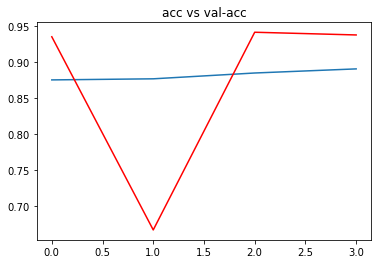

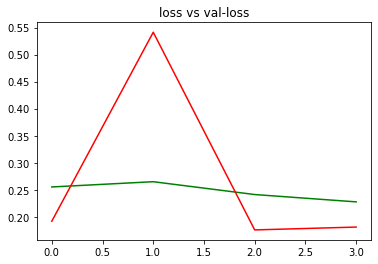

In [39]:
import matplotlib.pyplot as plt

plt.plot(r['accuracy'], c="blue")
plt.plot(r['val_accuracy'], c = "red")

plt.title("acc vs val-acc")
plt.show()


plt.plot(r['loss'], c = "green")
plt.plot(r['val_loss'], c = "red")

plt.title("loss vs val-loss")
plt.show()

Test Model

In [40]:
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing import image

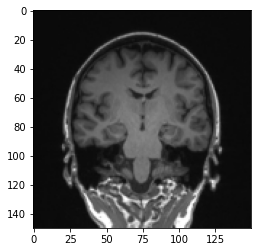

The prediction for this image is:  [[1.]]
Tumor Detected


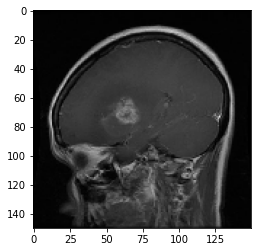

The prediction for this image is:  [[3.7283347e-34]]
Healthy Brain


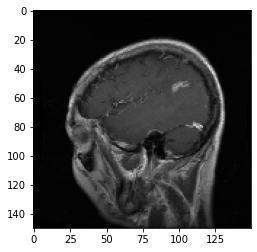

The prediction for this image is:  [[0.]]
Healthy Brain


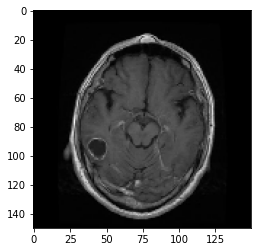

The prediction for this image is:  [[1.]]
Tumor Detected


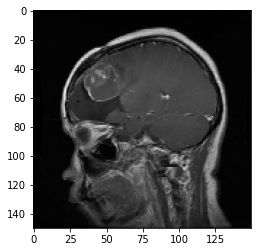

The prediction for this image is:  [[1.]]
Tumor Detected


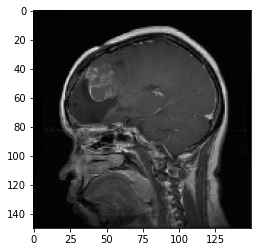

The prediction for this image is:  [[1.0761715e-06]]
Healthy Brain


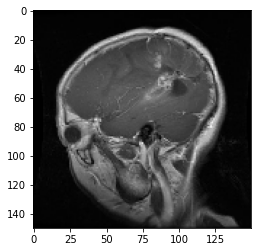

The prediction for this image is:  [[0.]]
Healthy Brain


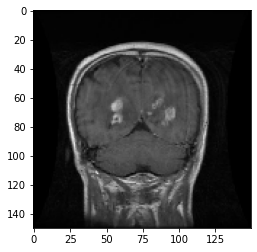

The prediction for this image is:  [[1.]]
Tumor Detected


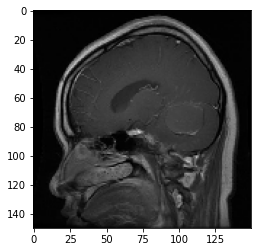

The prediction for this image is:  [[2.3296318e-16]]
Healthy Brain


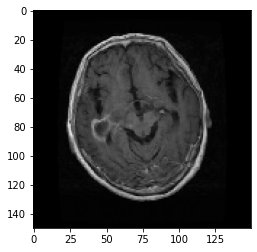

The prediction for this image is:  [[1.]]
Tumor Detected


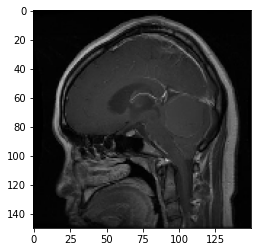

The prediction for this image is:  [[1.12205224e-20]]
Healthy Brain


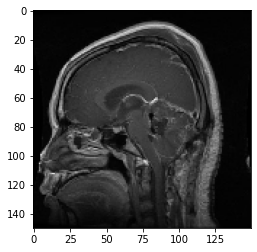

The prediction for this image is:  [[0.]]
Healthy Brain


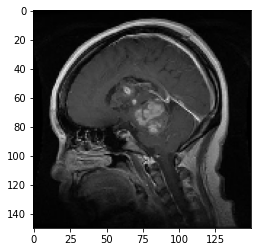

The prediction for this image is:  [[0.]]
Healthy Brain


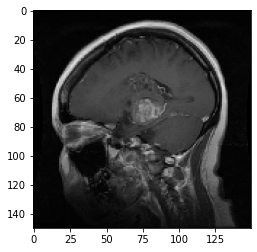

The prediction for this image is:  [[0.]]
Healthy Brain


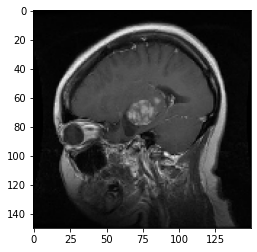

The prediction for this image is:  [[0.]]
Healthy Brain


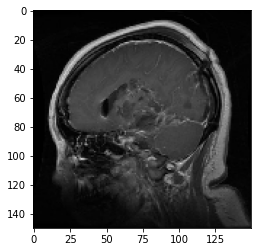

The prediction for this image is:  [[0.]]
Healthy Brain


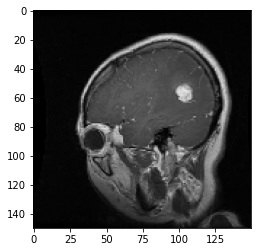

The prediction for this image is:  [[0.00161707]]
Healthy Brain


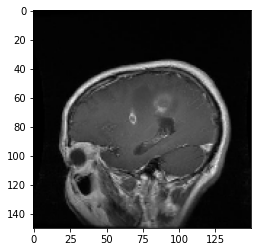

The prediction for this image is:  [[8.883196e-07]]
Healthy Brain


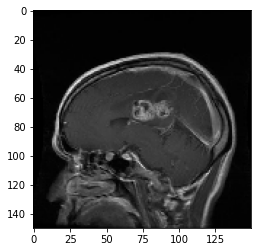

The prediction for this image is:  [[1.]]
Tumor Detected


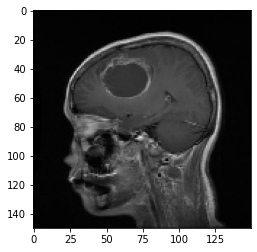

The prediction for this image is:  [[1.]]
Tumor Detected


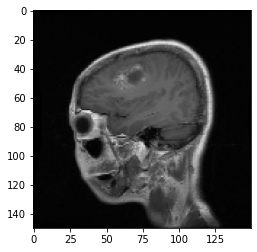

The prediction for this image is:  [[4.7593136e-13]]
Healthy Brain


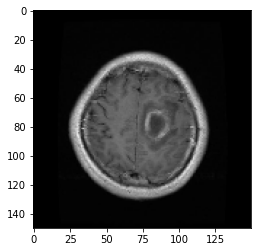

The prediction for this image is:  [[3.610085e-19]]
Healthy Brain


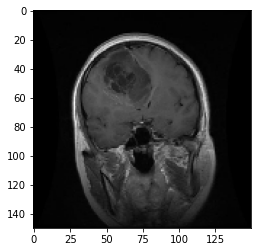

The prediction for this image is:  [[0.9999858]]
Tumor Detected


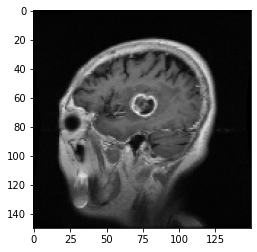

The prediction for this image is:  [[0.]]
Healthy Brain


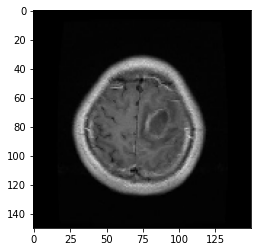

The prediction for this image is:  [[1.]]
Tumor Detected


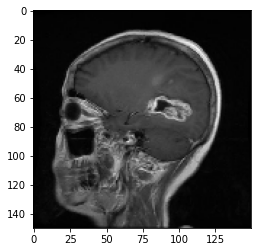

The prediction for this image is:  [[0.]]
Healthy Brain


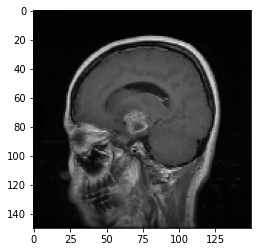

The prediction for this image is:  [[1.]]
Tumor Detected


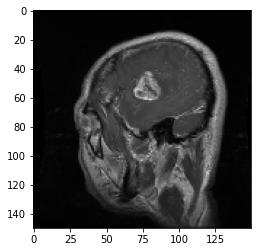

The prediction for this image is:  [[0.]]
Healthy Brain


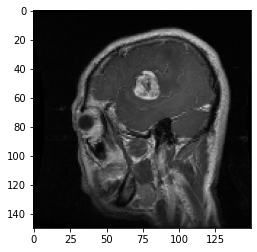

The prediction for this image is:  [[0.]]
Healthy Brain


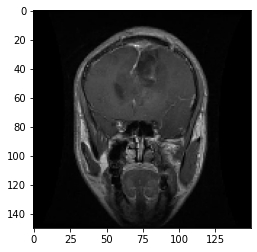

The prediction for this image is:  [[0.9980626]]
Tumor Detected


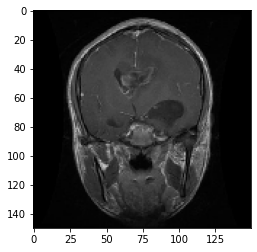

The prediction for this image is:  [[1.]]
Tumor Detected


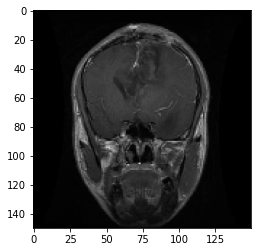

The prediction for this image is:  [[1.]]
Tumor Detected


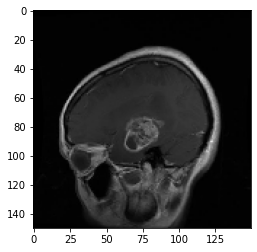

The prediction for this image is:  [[0.]]
Healthy Brain


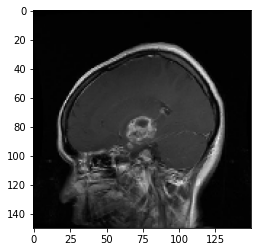

The prediction for this image is:  [[1.]]
Tumor Detected


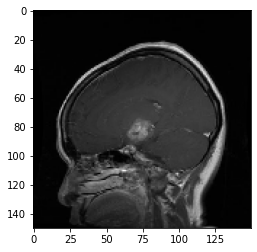

The prediction for this image is:  [[1.]]
Tumor Detected


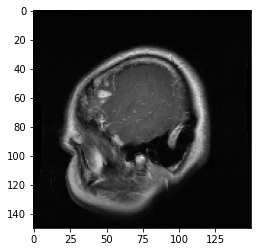

The prediction for this image is:  [[0.]]
Healthy Brain


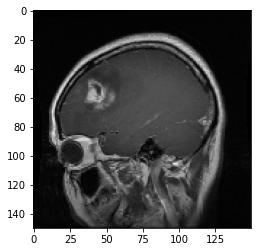

The prediction for this image is:  [[2.3392563e-14]]
Healthy Brain


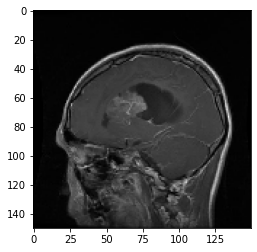

The prediction for this image is:  [[1.]]
Tumor Detected


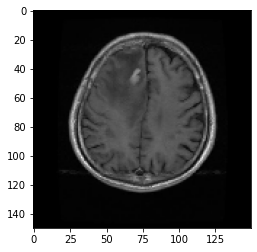

The prediction for this image is:  [[1.]]
Tumor Detected


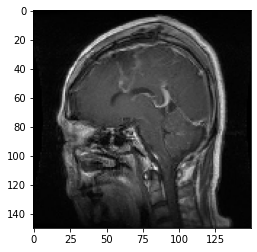

The prediction for this image is:  [[0.]]
Healthy Brain


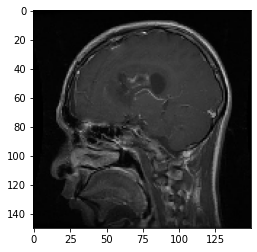

The prediction for this image is:  [[1.]]
Tumor Detected


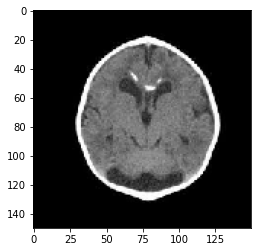

The prediction for this image is:  [[1.]]
Tumor Detected


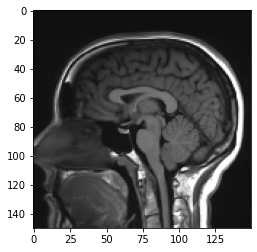

The prediction for this image is:  [[1.]]
Tumor Detected


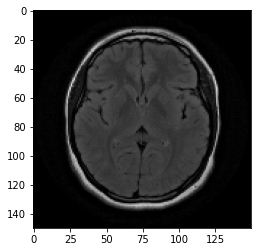

The prediction for this image is:  [[1.]]
Tumor Detected


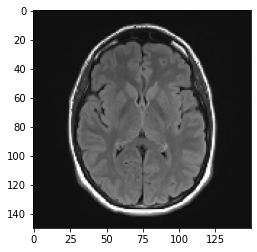

The prediction for this image is:  [[1.]]
Tumor Detected


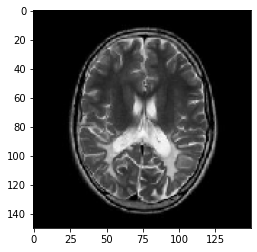

The prediction for this image is:  [[1.]]
Tumor Detected


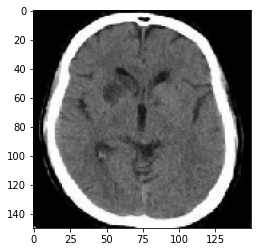

The prediction for this image is:  [[0.]]
Healthy Brain


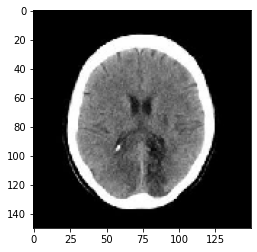

The prediction for this image is:  [[1.]]
Tumor Detected


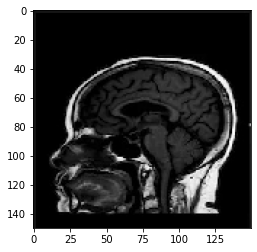

The prediction for this image is:  [[1.]]
Tumor Detected


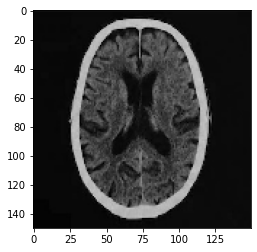

The prediction for this image is:  [[1.]]
Tumor Detected


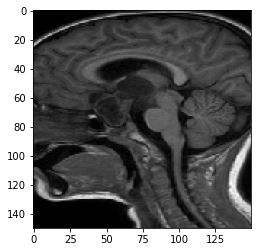

The prediction for this image is:  [[0.]]
Healthy Brain


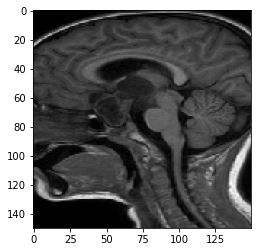

The prediction for this image is:  [[0.]]
Healthy Brain


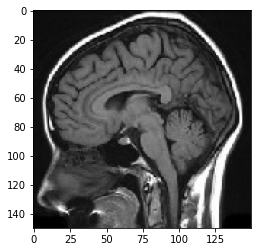

The prediction for this image is:  [[1.]]
Tumor Detected


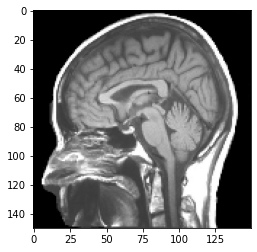

The prediction for this image is:  [[1.]]
Tumor Detected


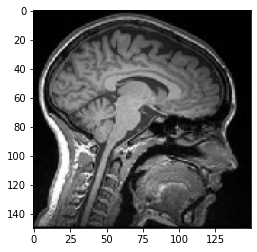

The prediction for this image is:  [[1.]]
Tumor Detected


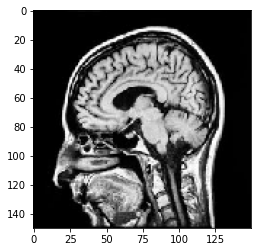

The prediction for this image is:  [[1.]]
Tumor Detected


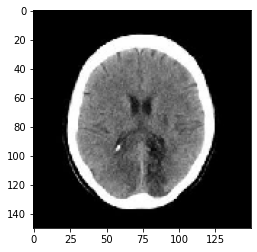

The prediction for this image is:  [[1.]]
Tumor Detected


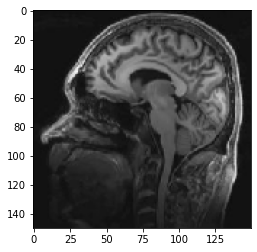

The prediction for this image is:  [[0.]]
Healthy Brain


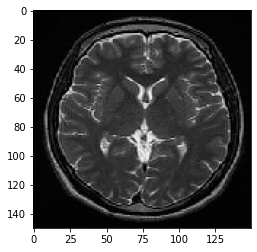

The prediction for this image is:  [[1.]]
Tumor Detected


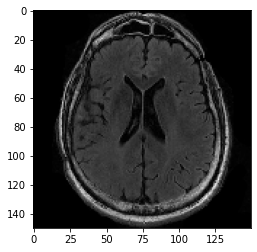

The prediction for this image is:  [[1.]]
Tumor Detected


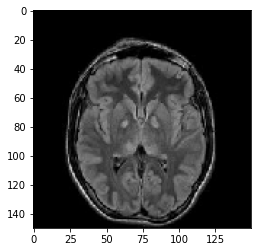

The prediction for this image is:  [[1.]]
Tumor Detected


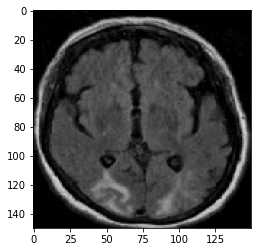

The prediction for this image is:  [[1.5879075e-16]]
Healthy Brain


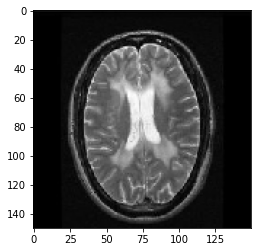

The prediction for this image is:  [[1.]]
Tumor Detected


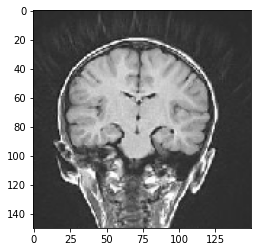

The prediction for this image is:  [[1.]]
Tumor Detected


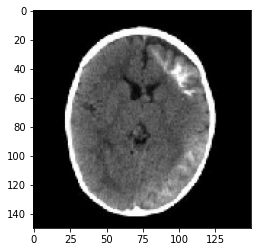

The prediction for this image is:  [[1.]]
Tumor Detected


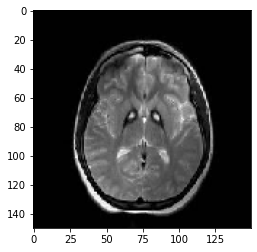

The prediction for this image is:  [[1.]]
Tumor Detected


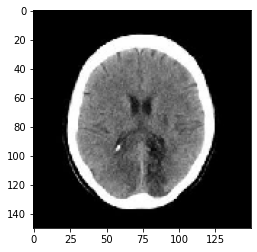

The prediction for this image is:  [[1.]]
Tumor Detected


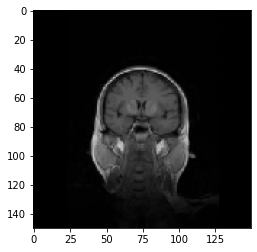

The prediction for this image is:  [[1.]]
Tumor Detected


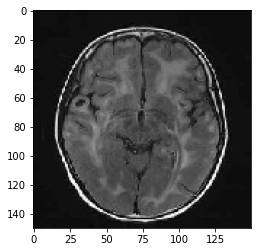

The prediction for this image is:  [[1.]]
Tumor Detected


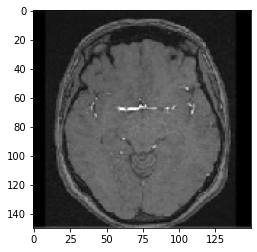

The prediction for this image is:  [[1.]]
Tumor Detected


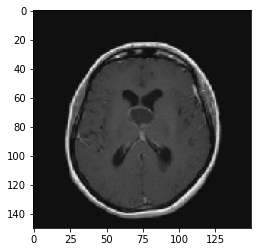

The prediction for this image is:  [[1.]]
Tumor Detected


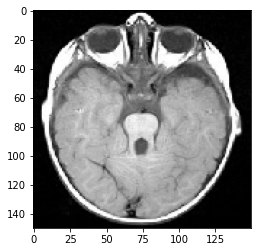

The prediction for this image is:  [[1.]]
Tumor Detected


In [48]:
dir_path = 'E:/datasets/basedata'

for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+'//'+ i,target_size=(150,150))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)#convert image to array
    X2 = X.reshape((1,) + X.shape)
    
    X2 = model.predict(X2)
    
    print("The prediction for this image is: ", X2)
    
    if X2 > 0.5:
        print("Healthy Brain")
    else:
        print("Tumor Detected")
        